In [13]:
# Set random seed for reproducibility
torch.manual_seed(42)
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [14]:

# -----------------------
# CONFIGURATION VARIABLES
# -----------------------
image_size = 224  # Resize images to 224x224 pixels
num_classes = 2  # Binary classification: COVID and Non-COVID
activation_function = 'relu'  # Hidden layer activation function
num_epochs = 10
learning_rate = 0.0001
batch_size = 16
use_early_stopping = True
patience = 3
dropout_rate = 0.5
train_split_ratio = 0.8  # Ratio of the dataset to use for training


In [15]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [16]:

# Set device (GPU preferable for deep learning)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [17]:
# Define activation function
def get_activation_function(name):
    if name == 'relu':
        return nn.ReLU()
    elif name == 'leaky_relu':
        return nn.LeakyReLU(negative_slope=0.01)
    elif name == 'sigmoid':
        return nn.Sigmoid()
    elif name == 'tanh':
        return nn.Tanh()
    else:
        raise ValueError(f"Invalid activation function name: {name}")

In [18]:
# Image transformations
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize images to [-1, 1]
])

In [19]:
# Load entire dataset using ImageFolder (folder structure-based dataset organization)
data_dir = "C:/Users/Indhuma/Downloads/ctscan-dataset/"
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

In [20]:

# Split dataset into training and test sets
train_size = int(train_split_ratio * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [21]:


# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [22]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self, num_classes, dropout_rate, activation_function):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(p=dropout_rate)
        self.activation_function = get_activation_function(activation_function)

        self.fc1 = nn.Linear(64 * (image_size // 8) * (image_size // 8), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(self.activation_function(self.conv1(x)))
        x = self.pool(self.activation_function(self.conv2(x)))
        x = self.pool(self.activation_function(self.conv3(x)))

        x = x.view(x.size(0), -1)  # Flatten
        x = self.activation_function(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

In [23]:
# Initialize the model, loss function, and optimizer
model = CNN(num_classes=num_classes, dropout_rate=dropout_rate, activation_function=activation_function).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [24]:
# Training loop
best_val_loss = float('inf')
epochs_no_improve = 0
loss_history = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    loss_history.append(train_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}")


Epoch [1/10], Loss: 0.6579
Epoch [2/10], Loss: 0.4892
Epoch [3/10], Loss: 0.3938
Epoch [4/10], Loss: 0.3508
Epoch [5/10], Loss: 0.3190
Epoch [6/10], Loss: 0.2829
Epoch [7/10], Loss: 0.2486
Epoch [8/10], Loss: 0.2397
Epoch [9/10], Loss: 0.2356
Epoch [10/10], Loss: 0.2027


In [37]:
# Early stopping
if use_early_stopping:
    if train_loss < best_val_loss:
        best_val_loss = train_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), "best_cnn_model.pth")
    else:
        epochs_no_improve += 1
    if epochs_no_improve >= patience:
        print("Early stopping triggered.")
        break

SyntaxError: 'break' outside loop (2734433794.py, line 11)

In [38]:
# Training loop
best_val_loss = float('inf')
epochs_no_improve = 0
loss_history = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    loss_history.append(train_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}")

    # Early stopping
    if use_early_stopping:
        if train_loss < best_val_loss:
            best_val_loss = train_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), "best_cnn_model.pth")
        else:
            epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered.")
            break

Epoch [1/10], Loss: 0.2146
Epoch [2/10], Loss: 0.1819
Epoch [3/10], Loss: 0.1784
Epoch [4/10], Loss: 0.1546
Epoch [5/10], Loss: 0.1475
Epoch [6/10], Loss: 0.1447
Epoch [7/10], Loss: 0.1421
Epoch [8/10], Loss: 0.1145
Epoch [9/10], Loss: 0.1181
Epoch [10/10], Loss: 0.1004


In [39]:

# Load the best model
model.load_state_dict(torch.load("best_cnn_model.pth"))

C:\Users\Indhuma\AppData\Local\Temp\ipykernel_6644\3219309454.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_cnn_model.pth"))


<All keys matched successfully>

Accuracy on test images: 92.96%

Classification Report:
              precision    recall  f1-score   support

       COVID       0.93      0.92      0.92       232
   non-COVID       0.93      0.94      0.93       265

    accuracy                           0.93       497
   macro avg       0.93      0.93      0.93       497
weighted avg       0.93      0.93      0.93       497


Confusion Matrix:
[[213  19]
 [ 16 249]]


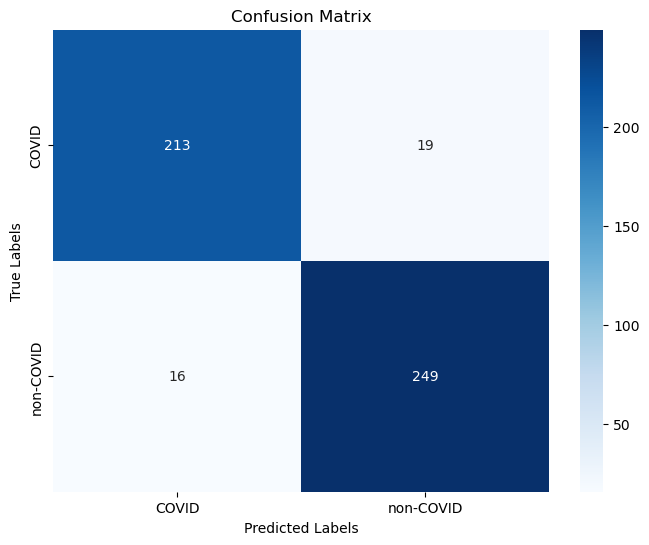

In [40]:
# Evaluate the model on the test set
model.eval()
all_labels = []
all_preds = []
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Print the accuracy
accuracy = 100 * correct / total
print(f"Accuracy on test images: {accuracy:.2f}%")

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=dataset.classes))

conf_matrix = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

np.random.seed(42)
